# RAINWATCH _ ML with DARTS 

## 0. Import libraries and data

In [63]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.metrics import *
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis
from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
    LinearRegressionModel,
    ARIMA,
    AutoARIMA,
    RegressionEnsembleModel,
    RegressionModel,
    Theta,
    FFT,
    RNNModel,
    BlockRNNModel

)

In [22]:
# import and preview data
df_rw = pd.read_csv('data/proc_data/weatherwcity.csv')
print(df_rw.info())
print(df_rw.head(3))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9328 entries, 0 to 9327
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Precipitation              9328 non-null   float64
 1   Date.Full                  9328 non-null   object 
 2   Date.Month                 9328 non-null   int64  
 3   Date.Week of               9328 non-null   int64  
 4   Date.Year                  9328 non-null   int64  
 5   StationCity                9328 non-null   object 
 6   Station.Code               9328 non-null   object 
 7   Station.Location           9328 non-null   object 
 8   StationState               9328 non-null   object 
 9   TempAvg                    9328 non-null   int64  
 10  Data.Temperature.Max Temp  9328 non-null   int64  
 11  Data.Temperature.Min Temp  9328 non-null   int64  
 12  Data.Wind.Direction        9328 non-null   int64  
 13  WindSpeed                  9328 non-null   float

## 1. Preprocesing for time series
A time series on Darts is based on the time indicating index. Thus, in this case, since an index needs to be unique there is a time series per station.
Let us focus on data from one station: Birmingham 

In [23]:
df_rw['Date']=df_rw['Date.Full'].apply(pd.to_datetime)

In [27]:
df_rw['stationcode'] =df_rw['Station.Code']

In [28]:
df_rw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9328 entries, 0 to 9327
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Precipitation              9328 non-null   float64       
 1   Date.Full                  9328 non-null   object        
 2   Date.Month                 9328 non-null   int64         
 3   Date.Week of               9328 non-null   int64         
 4   Date.Year                  9328 non-null   int64         
 5   StationCity                9328 non-null   object        
 6   Station.Code               9328 non-null   object        
 7   Station.Location           9328 non-null   object        
 8   StationState               9328 non-null   object        
 9   TempAvg                    9328 non-null   int64         
 10  Data.Temperature.Max Temp  9328 non-null   int64         
 11  Data.Temperature.Min Temp  9328 non-null   int64         
 12  Data.W

In [29]:
df_bhm=df_rw.query("stationcode == 'BHM'")

In [30]:
df_bhm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Precipitation              53 non-null     float64       
 1   Date.Full                  53 non-null     object        
 2   Date.Month                 53 non-null     int64         
 3   Date.Week of               53 non-null     int64         
 4   Date.Year                  53 non-null     int64         
 5   StationCity                53 non-null     object        
 6   Station.Code               53 non-null     object        
 7   Station.Location           53 non-null     object        
 8   StationState               53 non-null     object        
 9   TempAvg                    53 non-null     int64         
 10  Data.Temperature.Max Temp  53 non-null     int64         
 11  Data.Temperature.Min Temp  53 non-null     int64         
 12  Data.Wind.

<Axes: xlabel='Date'>

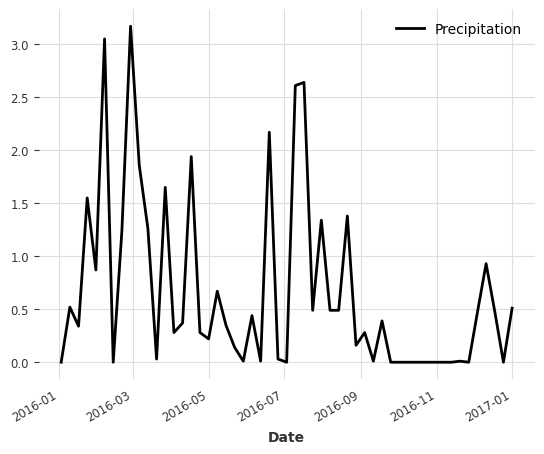

In [39]:
series_bhm = TimeSeries.from_dataframe(df_bhm, 'Date', 'Precipitation')
series_bhm.plot()

## 1. Statiscal Models 

In [45]:

from darts.models import AutoARIMA

train, val = series_bhm.split_before(pd.Timestamp('2016-10-16'))

model = AutoARIMA()
model.fit(train)
prediction = model.predict(len(val))


In [66]:
# fitting function
def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print('model {} obtains RMSE: {:.2f}%'.format(model, rmse(val, forecast)))

In [67]:
eval_model(model)

model AutoARIMA() obtains RMSE: 0.67%


## 2. Classic Machine Learning Models 

## 3. Deep Learning Models  